In [1]:
#Q.1
#Import data
import pandas as pd
data = pd.read_csv('C:\\Users\PMLS\\Documents\\zoya\\zoya\\ML internship\\ML Internship Task 1\\transaction_anomalies_dataset.csv')

In [2]:
data

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings


In [3]:
#check null values
null_values = data.isnull().sum()

In [4]:
#check column info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
None


In [5]:
#descriptive statistics of the data.
print(data.describe())

       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225                     8.361258    13.8199

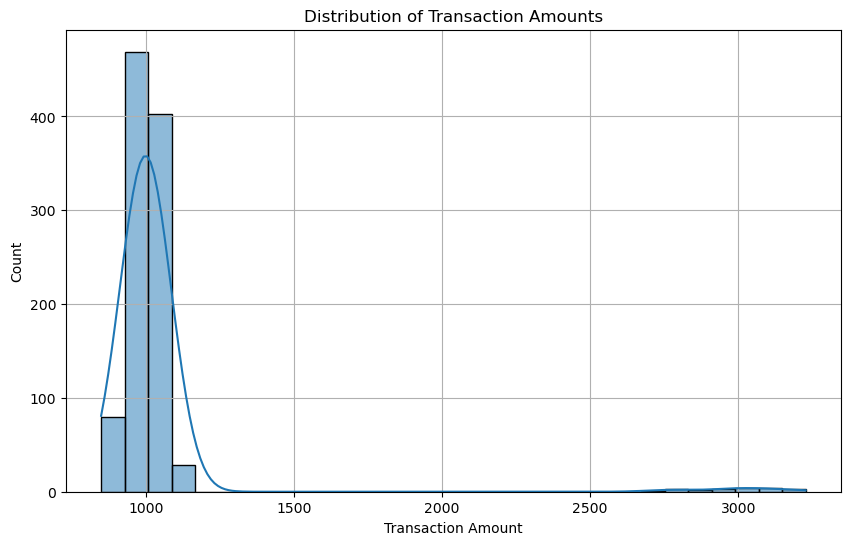

In [6]:
#Q.2
#Check distribution of transactions amount in the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Transaction_Amount', bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()

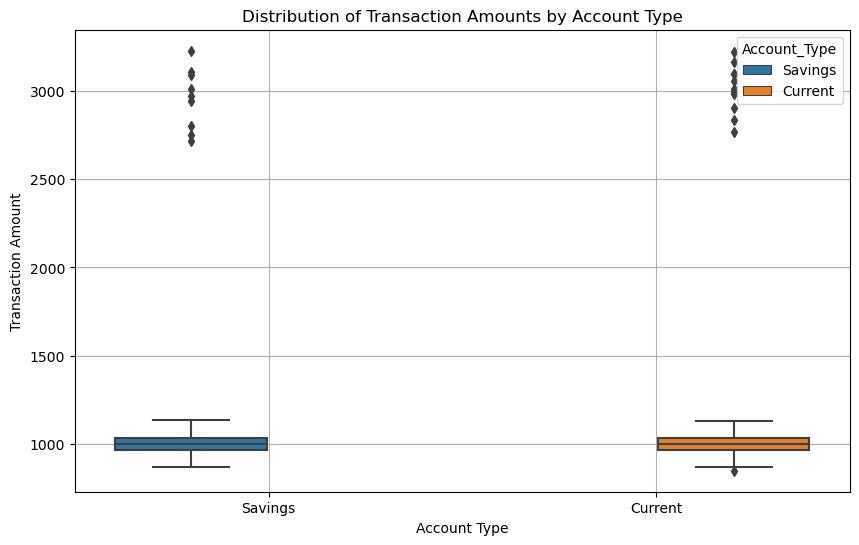

In [7]:
#Q.3type
#Check distribution of transactions amount by account 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting distribution of transaction amounts by account type using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Account_Type', y='Transaction_Amount', hue='Account_Type')
plt.title('Distribution of Transaction Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

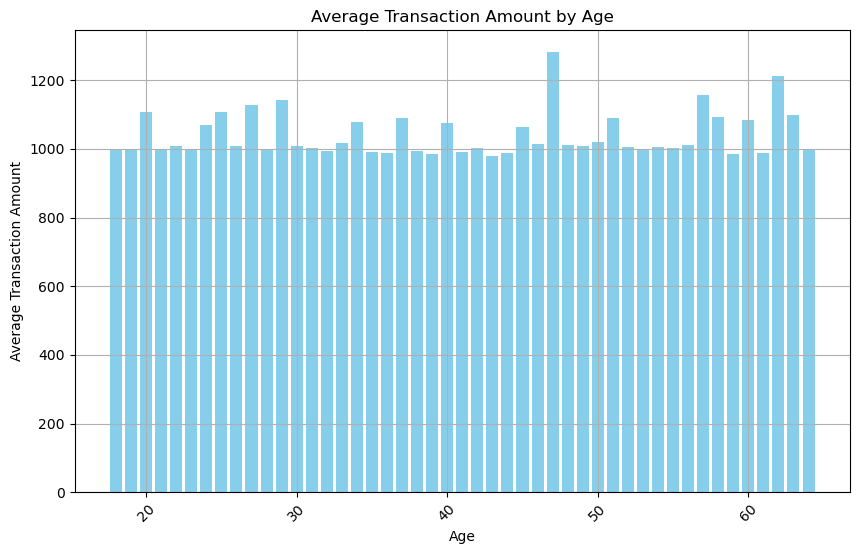

In [8]:
#Q.4:
#Check the average transaction amount by age.
import pandas as pd
import matplotlib.pyplot as plt

# Calculating average transaction amount by age
avg_amount_by_age = data.groupby('Age')['Transaction_Amount'].mean().reset_index()

# Plot average transaction amount by age
plt.figure(figsize=(10, 6))
plt.bar(avg_amount_by_age['Age'], avg_amount_by_age['Transaction_Amount'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

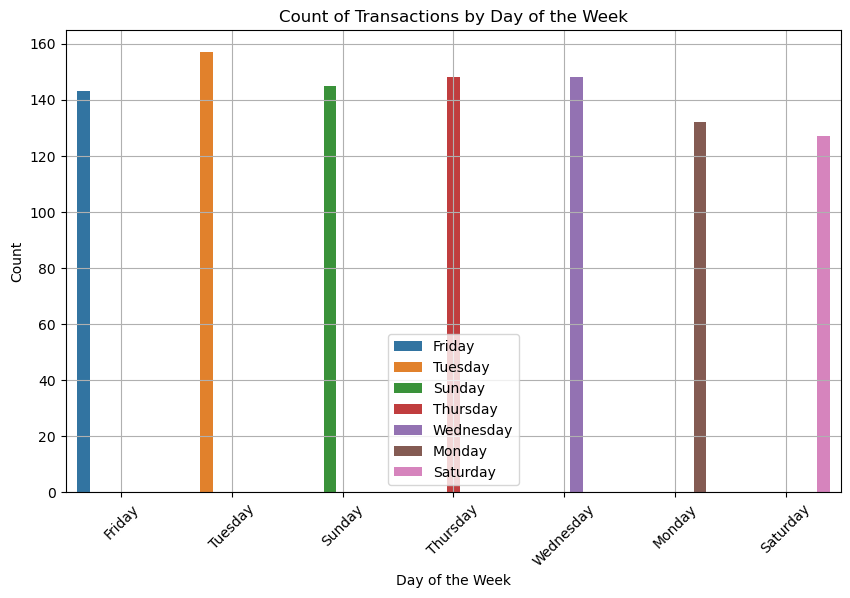

In [9]:
#Q.5:
#Check the count of transactions by day of the week
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the count of transactions by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Day_of_Week', hue='Day_of_Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Transactions by Day of the Week')
plt.xticks(rotation=45)
plt.legend(title=None)
plt.grid(True)
plt.show()

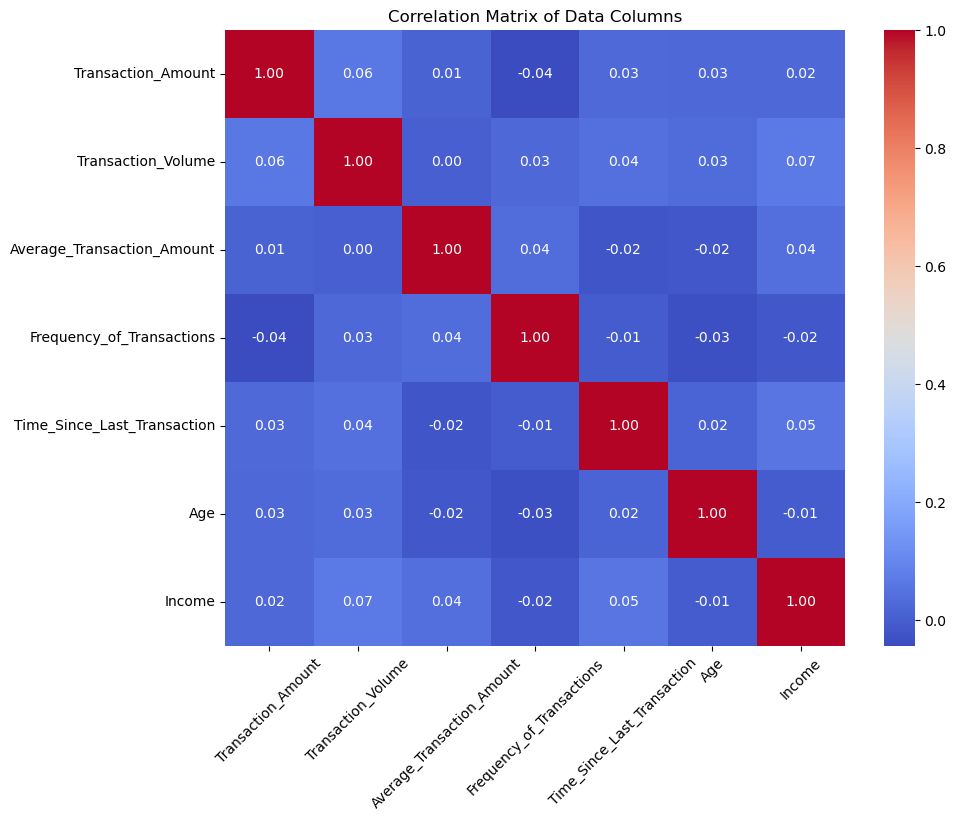

In [10]:
#Q.6:
#Check the correlation between all the columns in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#exclude non numeric columns from correlation calculation
numeric_data=data.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Data Columns')
plt.xticks(rotation=45)
plt.show()


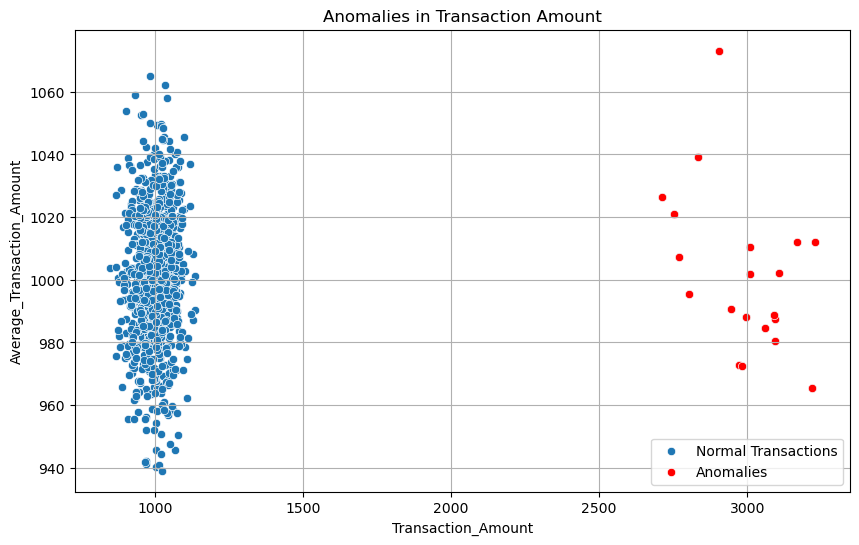

In [11]:
#Q.7:
#Visualize anomalies in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#threshold for transactiob amount
threshold_amount= data['Transaction_Amount'].mean() + 2 * data['Transaction_Amount'].std()

#Filter out anomalies
anomalies = data[data['Transaction_Amount'] > threshold_amount]
# Visualize anomalies using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Transaction_Amount', y='Average_Transaction_Amount', label='Normal Transactions')
sns.scatterplot(data=anomalies, x='Transaction_Amount', y='Average_Transaction_Amount', color='red', label='Anomalies')
plt.xlabel('Transaction_Amount')
plt.ylabel('Average_Transaction_Amount')
plt.title('Anomalies in Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#Q.8:
import pandas as pd

#threshold for transactiob amount
threshold_amount= data['Transaction_Amount'].mean() + 2 * data['Transaction_Amount'].std()

#number of anomalies in data
number_of_anomalies = data[data['Transaction_Amount'] > threshold_amount].shape[0]
#total data points
total_data_points = data.shape[0]
#ratio of anomalies in data
anomaly_ratio = number_of_anomalies / total_data_points

print("Number of Anomalies",number_of_anomalies)
print("Total data points",total_data_points)
print("Ratio of anomalies",anomaly_ratio)
      

Number of Anomalies 20
Total data points 1000
Ratio of anomalies 0.02


In [13]:
#Q.9:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Select relevant features for anomaly detection
selected_features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                     'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income', 'Account_Type']
#drop rows with missig values
data.dropna(subset=selected_features, inplace=True)
#encode variable 'Account_Type'
label_encoder = LabelEncoder()
data['Account_Type'] = label_encoder.fit_transform(data['Account_Type'])

# Create an Isolation Forest instance
isolation_forest = IsolationForest(contamination='auto')
# Fit the model 
isolation_forest.fit(data[selected_features])

# Get predictions on  data
prediction = isolation_forest.decision_function(data[selected_features])

# Convert predictions into binary values (0 for normal, 1 for anomaly)
binary_predictions = [1 if pred == -1 else 0 for pred in prediction]

#add binary prediction to data
data['Anomaly'] = binary_predictions

# Print the binary predictions
print(data.head())

  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday       06:00   36    Male  1436074   
1                           22      Friday       01:00   41  Female   627069   
2                           12     Tue

In [1]:
#Q.10:
from sklearn.metrics import classification_report

#  the binary predictions

#  actual labels (ground truth) for the testing data
actual_labels = [0] * 196 + [1] * 4
binary_predictions = [0] * 196 + [1] * 4

# Calculate the classification report
report = classification_report(actual_labels, binary_predictions)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [2]:
#Q.11:
import pandas as pd


#enter transaction detail
Transaction_Amount = float(input("enter value of 'Transaction_Amount': "))
Average_Transaction_Amount = float(input("enter the value for'Average_Transaction_Amount': "))
Frequency_of_Transactions = float(input("enter the value for 'Frequency_of_Transactions': "))

#dictionary 
transaction_details = {
    "Transaction_Amount": Transaction_Amount,
    "Average_Transaction_Amount": Average_Transaction_Amount,
    "Frequency_of_Transactions": Frequency_of_Transactions
}

#converting dictionary to dataframe
transaction_data = pd.DataFrame([transaction_details])

# Get predictions on  data
prediction = isolation_forest.decision_function(transaction_data)

#setting a threshold to classify anomalies
threshold = 0

if prediction < threshold:
    print("anomaly detected: This transaction is flagged as an anomaly")
else:
    print("no anomaly detected: This transaction is not flagged as an anomaly")
    


enter value of 'Transaction_Amount': 10000
enter the value for'Average_Transaction_Amount': 900
enter the value for 'Frequency_of_Transactions': 6


NameError: name 'isolation_forest' is not defined